In [1]:
from coders import FeatureQAM as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[7868] Lock acquired: 4


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 20, 0.2, 0.1)
population.evolve(10000, max_iter=3*gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 1282/1030/533
Gen average time: 0:00:09.117019
Gen 2 grades: 1586/1087/692
Gen average time: 0:00:07.565062
Gen 3 grades: 1733/1374/908
Gen average time: 0:00:06.417927
Gen 4 grades: 1204/1077/624
Gen average time: 0:00:06.163458
Gen 5 grades: 1364/1084/611
Gen average time: 0:00:05.990448
Gen 6 grades: 1278/1133/614
Gen average time: 0:00:05.311142
Gen 7 grades: 1167/1054/647
Gen average time: 0:00:05.196404
Gen 8 grades: 1485/1044/615
Gen average time: 0:00:05.415534
Gen 9 grades: 1322/1145/750
Gen average time: 0:00:05.218166
Gen 10 grades: 1243/1177/764
Gen average time: 0:00:04.985741
Gen 11 grades: 1364/1207/698
Gen average time: 0:00:04.791481
Gen 12 grades: 1733/1313/861
Gen average time: 0:00:04.523040
Gen 13 grades: 1449/1216/760
Gen average time: 0:00:04.379226
Gen 14 grades: 1494/996/600
Gen average time: 0:00:04.591197
Gen 15 grades: 1539/1139/553
Gen average time: 0:00:05.077178
Gen 16 grades: 1204/1070/724
Gen average time: 0:00:05.009996
Gen 17 grades: 168

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/FeatureQAM_GA_2018511827072.pdf


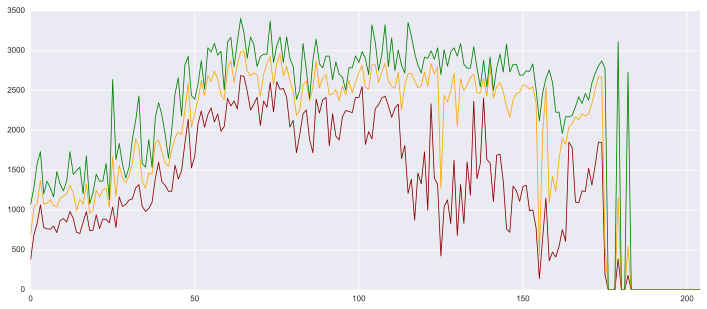

In [5]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
for c in population._sort(10000):
    print(c)

FeatureQAM:
    low_amplitude: 0.17931392834140383
    symbol_duration: 0.0008252368638002243
    symbol_width: 3
    d_high_amplitude: 0.9314116101575345
    sqe_end_v: 0.20294331719976938
    peak_width_span: 0.1552528917100709
    peak_width_start: 0.935084333843363
    d_symbol_shifts_scale: 4
    sqe_end: 0.11497580332874133
    amplitude: 0.755922987930419
    filter_std_scale: 0.37463787381362723
    symbol_levels: 2
    high_amplitude: 0.6765660392572834
    frequency: 2213
    filter_window_scale: 0.43864268027040226
    filter_std_base: 25
    symbol_shifts: 4
    peak_threshold: 0.467205768974918
    filter_type: 1
    d_low_amplitude: 0.6277658265414113
    sqe_start_v: 0.6730440538905118
    filter_shape: 0.5024569180190458
    rate: 96000
    filter_window_base: 16
    d_comparison_type: 1
    sqe_start: 0.12872954849452561
FeatureQAM:
    low_amplitude: 0.64639909771537
    symbol_duration: 0.0009143615741222766
    symbol_width: 3
    d_high_amplitude: 0.442144284166373

In [13]:
for c in population._sort(10000, 179)[:3]:
    print(*coder_fitness(0, 3000)(c, raw=True))
    print(c)

3272.727272727273 0.942
FeatureQAM:
    low_amplitude: 0.4037636285434278
    symbol_duration: 0.0009143615741222766
    symbol_width: 3
    d_high_amplitude: 0.9213348055936768
    sqe_end_v: 0.6278488478366279
    peak_width_span: 0.11290376270013674
    peak_width_start: 0.2864096459053678
    d_symbol_shifts_scale: 4
    sqe_end: 0.17787293630414724
    amplitude: 0.2962919023600572
    filter_std_scale: 0.3323770348780735
    symbol_levels: 2
    high_amplitude: 0.9603746324629933
    frequency: 2835
    filter_window_scale: 0.015295104687107694
    filter_std_base: 13
    symbol_shifts: 4
    peak_threshold: 0.06055538838931319
    filter_type: 3
    d_low_amplitude: 0.2883625377230916
    sqe_start_v: 0.8702573450719604
    filter_shape: 0.26652693006858597
    rate: 96000
    filter_window_base: 16
    d_comparison_type: 1
    sqe_start: 0.08206694355508445
2969.0721649484535 0.9523333333333334
FeatureQAM:
    low_amplitude: 0.4037636285434278
    symbol_duration: 0.00100805564

In [ ]:
top1[160:180]